# hw3
20160463 성해빈

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math


points_list = [ [] for _ in range(3)] # (index, x, y) for 10, 100, 1000


with open("TSP_10.txt", "r") as f:
    for line in f.readlines():
        s = line.rstrip().split(',')
        points_list[0].append((int(s[0]), float(s[1]), float(s[2])))


with open("TSP_100.txt", "r") as f:
    for line in f.readlines():
        s = line.rstrip().split(',')
        points_list[1].append((int(s[0]), float(s[1]), float(s[2])))
        
with open("TSP_1000.txt", "r") as f:
    for line in f.readlines():
        s = line.rstrip().split(',')
        points_list[2].append((int(s[0]), float(s[1]), float(s[2])))

        
        
def print_path(points, path):
    trajectory = np.array([[points[i][1], points[i][2]] for i in path])
    xs = [p[1] for p in points]
    ys = [p[2] for p in points]
    


    plt.rcParams['figure.figsize'] = 10,10
    plt.plot(trajectory[:, 0], trajectory[:, 1])
    plt.scatter(xs, ys, edgecolors='black', lw=1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
        

Nearest Neighbor


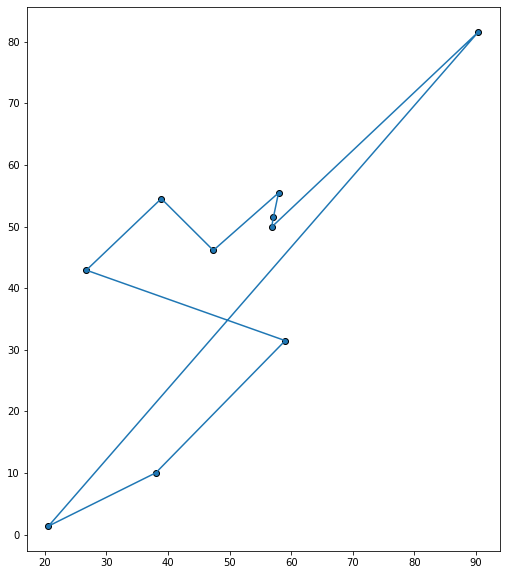

Average total length of tour : 285.60676943675765


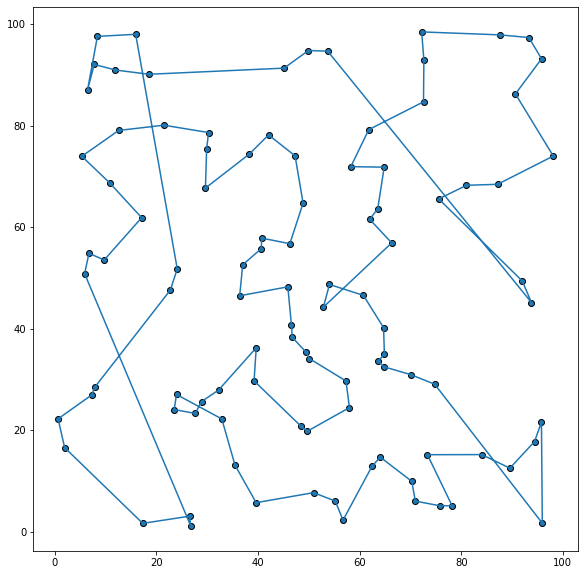

Average total length of tour : 954.8754663578433


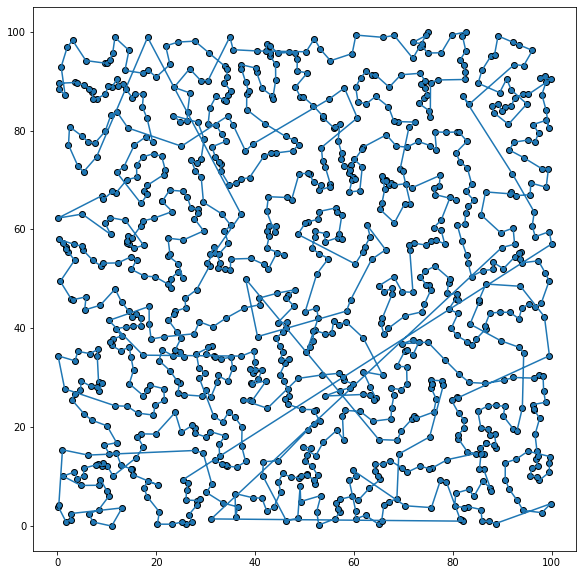

Average total length of tour : 2920.1144502941015


In [2]:
# Nearest Neighbor
def NN(points):
    points = points.copy()
    path = []
    total_dist = 0
    start_idx = np.random.choice(len(points)) # random select starting node
    start = points[start_idx]
    
    path.append(points[start_idx][0])
    current = points.pop(start_idx)
    
    while len(points) > 0:
        
        # find closest node
        min_dist, min_neighbor = None, None
        for index, (_, x, y) in enumerate(points):
            
            dist = math.sqrt((x-current[1])**2 + (y-current[2])**2)

            if min_dist == None:
                min_dist, min_neighbor = dist, index
            elif min_dist > dist:
                min_dist, min_neighbor = dist, index

        total_dist += min_dist
        path.append(points[min_neighbor][0])
        current = points.pop(min_neighbor)

    total_dist += math.sqrt((current[1]-start[1])**2 + (current[2]-start[2])**2)
    path.append(start_idx)
    
    return path, total_dist

print("="*50)
print("Nearest Neighbor")
print("="*50)
for points in points_list:
    avg_length = 0
    for _ in range(10):
        path, total_dist = NN(points)
        avg_length += total_dist
        
    avg_length /= 10
    print_path(points, path)
    print("Average total length of tour : {}".format(avg_length))

Nearest Addition


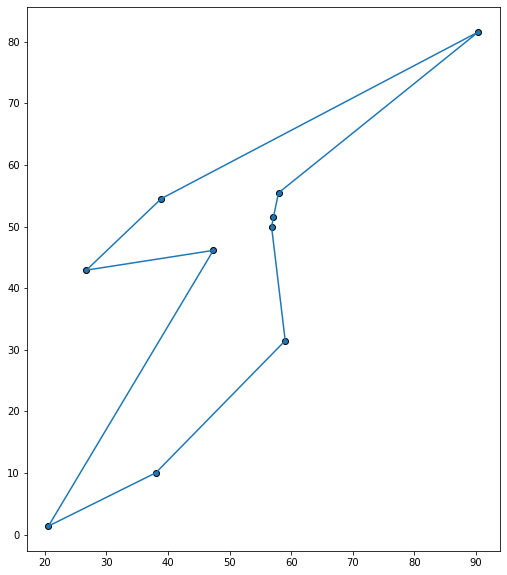

Average total length of tour : 263.31573543137125


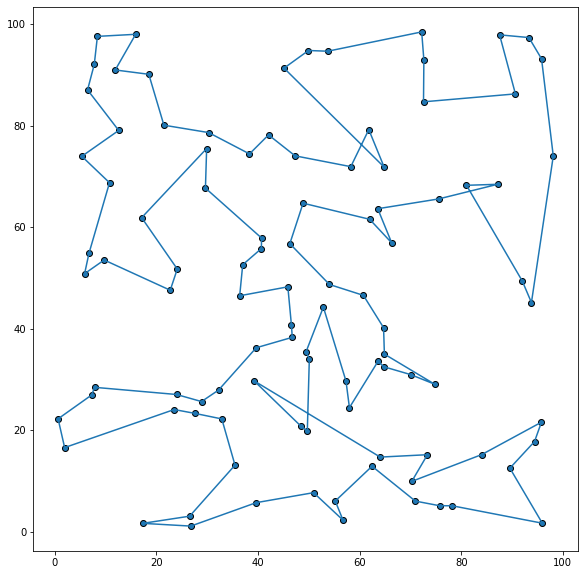

Average total length of tour : 945.5303601840794


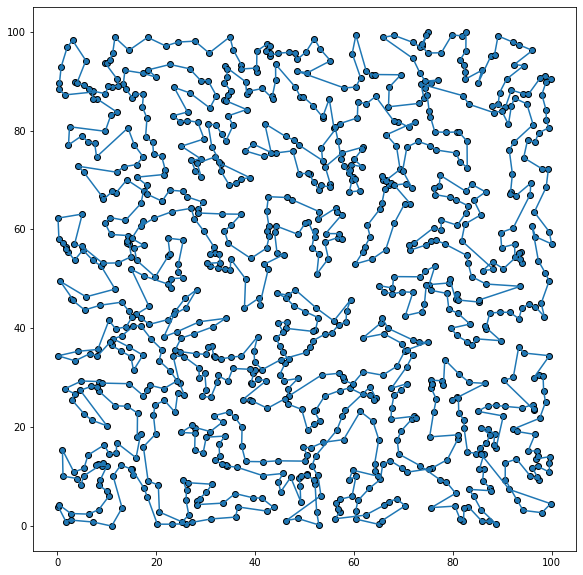

Average total length of tour : 2788.607199074667


In [5]:
# Nearest Addition
def NA(points):
    points = points.copy()
    path = []
    total_dist = 0
    
    c = [[0 for _ in range(len(points))] for _ in range(len(points))]
    init_i, init_j = None, None
    min_dist = 0
    for i in range(len(points)):
        for j in range(len(points)):
            if i != j:
                c[i][j] = math.sqrt((points[i][1] - points[j][1])**2 + (points[i][2] - points[j][2])**2)
                if init_i == None:
                    init_i, init_j = i,j
                    min_dist = c[i][j]
                elif min_dist > c[i][j]:
                    init_i, init_j = i,j
                    min_dist = c[i][j]
    
    total_dist += min_dist * 2
    path.append(init_i)
    path.append(init_j)
    path.append(init_i) # initial tour : choose i, j with minimal dist
    i_point = points[init_i]
    j_point = points[init_j]
    points.remove(i_point)
    points.remove(j_point)
    
    while len(points) > 0:
        
        min_dist = 0
        min_pos = None
        min_k_idx = None
        
        # choose k, i, j that insertion of k makes minimum distance gain
        for k_idx, (k, _, _) in enumerate(points):
            for idx in range(len(path) - 1):
                i = path[idx]
                j = path[idx+1]

                dist = c[i][k] + c[k][j] - c[i][j]

                if min_pos == None:
                    min_dist = dist
                    min_pos = idx
                    min_k_idx = k_idx
                elif min_dist > dist:
                    min_dist = dist
                    min_pos = idx
                    min_k_idx = k_idx

                
        total_dist += min_dist

        path.insert(min_pos+1, points[min_k_idx][0])
        points.pop(min_k_idx)

    
    return path, total_dist


print("="*50)
print("Nearest Addition")
print("="*50)
for points in points_list:
    avg_length = 0
    for _ in range(10):
        path, total_dist = NA(points)
        avg_length += total_dist
        
    avg_length /= 10
    print_path(points, path)
    print("Average total length of tour : {}".format(avg_length))

Farthest Addition


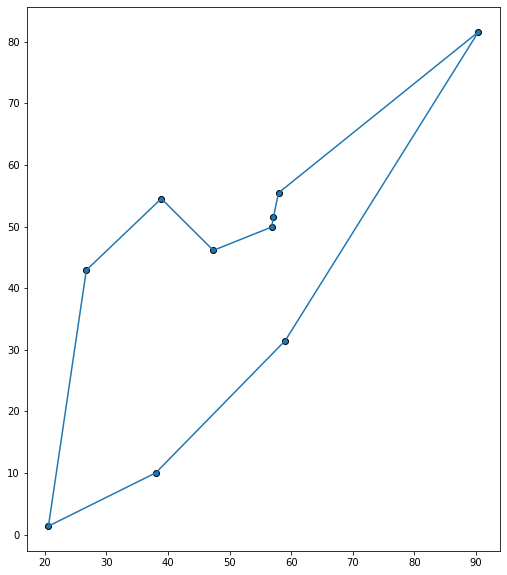

Average total length of tour : 238.90428896281657


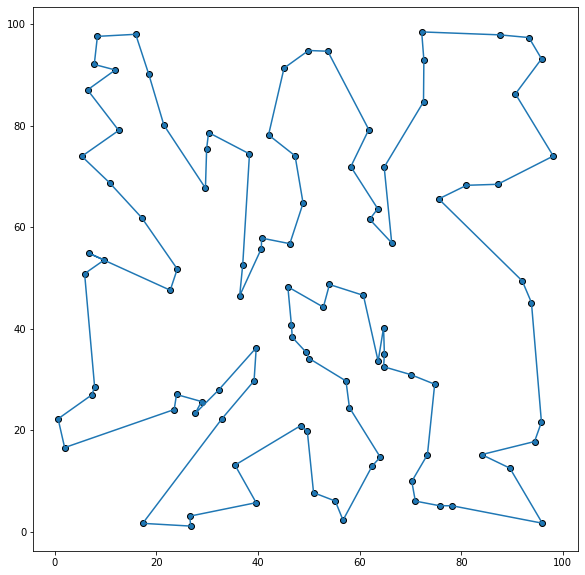

Average total length of tour : 866.1223307528198


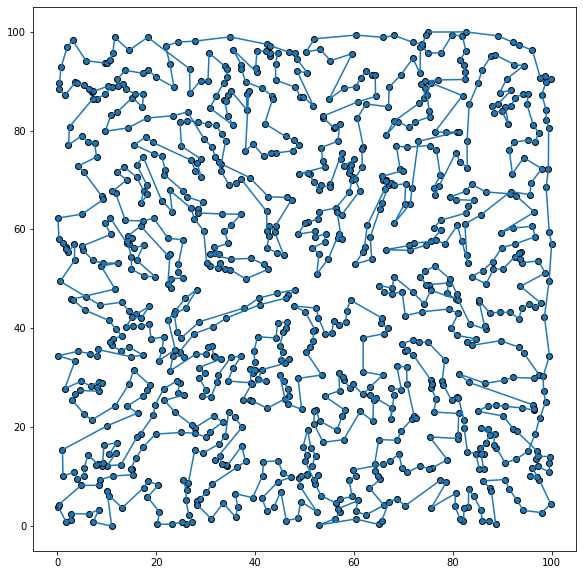

Average total length of tour : 2890.6668270846303


In [4]:
# Farthest Addition
def FA(points):
    points = points.copy()
    path = []
    total_dist = 0
    
    c = [[0 for _ in range(len(points))] for _ in range(len(points))]
    init_i = np.random.choice(len(points)) # start from random i
    max_j = None
    max_dist = None
    for i in range(len(points)):
        for j in range(len(points)):
            if i != j:
                c[i][j] = math.sqrt((points[i][1] - points[j][1])**2 + (points[i][2] - points[j][2])**2)
                
                if i == init_i:
                    if max_j == None:
                        max_j = j
                        max_dist = c[i][j]
                    elif max_dist < c[i][j]: # pick farthest j from i
                        max_j = j
                        max_dist = c[i][j] 
    
    
    total_dist += max_dist * 2
    path.append(init_i)
    path.append(max_j)
    path.append(init_i) # initial tour
    
    i_point = points[init_i]
    j_point = points[max_j]
    points.remove(i_point)
    points.remove(j_point)
    
    while len(points) > 0:
        
        
        max_dist = 0
        max_k_idx = None
        
        # Find a node k not in the subtour that is farthest from any of the subtour nodes
        for k_idx, (k, _, _) in enumerate(points):
            for idx in range(len(path)):
                i = path[idx]
                dist = c[i][k]
                if max_k_idx == None:
                    max_k_idx = k_idx
                    max_dist = dist
                elif max_dist < dist:
                    max_k_idx = k_idx
                    max_dist = dist
        
        k = points[max_k_idx][0]
        points.pop(max_k_idx)
        
        
        
        min_dist = 0
        min_pos = None
        
        # Find an edge [i,j] of the subtour to which the insertion of k gives the smallest increase of length
        for idx in range(len(path) - 1):
            i = path[idx]
            j = path[idx+1]

            dist = c[i][k] + c[k][j] - c[i][j]

            if min_pos == None:
                min_dist = dist
                min_pos = idx
            elif min_dist > dist:
                min_dist = dist
                min_pos = idx

                
        total_dist += min_dist

        path.insert(min_pos+1, k)

    
    return path, total_dist


print("="*50)
print("Farthest Addition")
print("="*50)
for points in points_list:
    avg_length = 0
    for _ in range(10):
        path, total_dist = FA(points)
        avg_length += total_dist
        
    avg_length /= 10
    print_path(points, path)
    print("Average total length of tour : {}".format(avg_length))

In [10]:
def OPT2full(points, path):
    pass
                    

def OPT2greedy_helper(path, dist):
    for idx in range(len(path)-1): # (a,b)
        for idx2 in range(len(path)-1): # (c,d)
            if abs(idx - idx2) > 1 and idx < idx2: # edge dont share vertex
                a = path[idx]
                b = path[idx+1]
                d = path[idx2]
                c = path[idx2+1]
                
                gain = dist[a][d] + dist[b][c] - dist[c][d] - dist[a][b]
                if gain < 0:
                    return idx, idx2 # improved
    return None, None # not improved

                    
def OPT2greedy(points, path):
    dist = [[0 for _ in range(len(points))] for _ in range(len(points))]
    for i in range(len(points)):
        for j in range(len(points)):
            if i != j:
                dist[i][j] = math.sqrt((points[i][1] - points[j][1])**2 + (points[i][2] - points[j][2])**2)
                
    while True:
    
        idx, idx2 = OPT2greedy_helper(path, dist)
        if idx != None:
            # change path
            
            path = path[:idx+1] + path[idx+1:idx2+1][::-1] + path[idx2+1:]
        else:
            break
    
    
    return path
        

print("="*50)
print("Nearest Neighbor")
print("="*50)
for points in points_list:
    avg_length = 0
    avg_length_opt_greedy = 0
    for _ in range(10):
        path, total_dist = NN(points)
        avg_length += total_dist
        
        path_opt_greedy = OPT2greedy(points, path)
        
        
    avg_length /= 10
    print_path(points, path)
    print("Average total length of tour : {}".format(avg_length))
    
    print_path(points, path_opt_greedy)
    
    

Nearest Neighbor
[6, 3, 8, 4, 5, 7, 2, 9, 0, 1, 6]
[9, 2, 7, 5, 4, 8, 3, 6, 1, 0, 9]


KeyboardInterrupt: 